In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
# read training data
bank_train = pd.read_csv("training-training-bank_train/bank_train.csv")

In [4]:
# read test data
bank_test = pd.read_csv("validation-validation-bank_test/bank_test.csv")

In [5]:
print(bank_train.head())
print(bank_test.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   39       156         5    999         0           1.4          94.465   
1   25       103         1    999         0           1.4          93.918   
2   50       121         2    999         0           1.1          93.994   
3   45       187         1    999         0           1.4          93.444   
4   46       124         4    999         0          -1.8          93.075   

   cons.conf.idx  euribor3m  nr.employed    ...     job  marital  education  \
0          -41.8      4.865       5228.1    ...       4        1          1   
1          -42.7      4.963       5228.1    ...       0        2          3   
2          -36.4      4.859       5191.0    ...       9        1          5   
3          -36.1      4.965       5228.1    ...       1        1          0   
4          -47.1      1.405       5099.1    ...       7        1          3   

   default  housing  loan  contact  month  day_of_week  poutco

In [6]:
# create x_train and y_train
x_train = bank_train.drop(['purchased', 'id'], axis=1)
y_train = bank_train[['purchased']]

In [7]:
#####################################################
## Implement GridSearchCV to find optimal max_depth
#####################################################

In [8]:
# specify number of folds for k-fold CV
n_folds = 5

In [36]:
# specify range of the hyperparameter max_depth 
parameters = {'max_depth': range(2, 20, 5)}

In [37]:
# instantiate the model
rf = RandomForestClassifier()

In [38]:
# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", 
                   return_train_score = True)

In [39]:
# fit the rf model 
rf.fit(x_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Ana

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [40]:
# store scores/results of GridSearch CV in a df
scores = rf.cv_results_
print(pd.DataFrame(scores).head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.018001      0.006632         0.002401        0.000801   
1       0.026601      0.008310         0.002801        0.000980   
2       0.025603      0.004222         0.002398        0.000801   
3       0.029403      0.010820         0.002600        0.000799   

  param_max_depth             params  split0_test_score  split1_test_score  \
0               2   {'max_depth': 2}           0.904401           0.907436   
1               7   {'max_depth': 7}           0.918058           0.915023   
2              12  {'max_depth': 12}           0.907436           0.896813   
3              17  {'max_depth': 17}           0.910470           0.908953   

   split2_test_score  split3_test_score       ...         mean_test_score  \
0           0.893778           0.902883       ...                0.902580   
1           0.883156           0.911988       ...                0.908346   
2           0.893778           0.913505   

In [41]:
#####################################################
## Plot mean_train_score and mean_test_score (accuracies) on the x-axis
# and param_max_depth on the y-axis
#####################################################

In [42]:
print(scores["mean_train_score"])

[0.90174507 0.94666161 0.98467375 0.99301973]


No handles with labels found to put in legend.


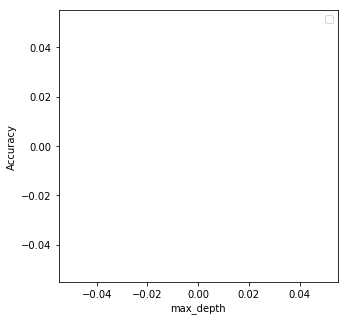

In [47]:
plt.figure(figsize=[5,5])
plt.plot(x= scores["param_max_depth"], 
         y= scores["mean_train_score"], 
         label="training accuracy")
#plt.plot(x= scores["param_max_depth"], 
#         y= scores["mean_test_score"], 
#         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#plt.savefig('output/max_depth.png') 

In [ ]:
# from the plot, observe the optimal value of max_depth
# and store in max_depth_optimal
# max_depth_optimal = 


In [ ]:
#########################################
# Build the model with optimal max_depth
#########################################
# rf = RandomForestClassifier(max_depth = max_depth_optimal)
# rf.fit(x_train, y_train)

In [ ]:
## Make predictions
# predictions = rf.predict(bank_test.drop(['id'], axis=1))
# print(predictions[:5])

In [ ]:
# Write columns id, predictions into the output file
# d = pd.DataFrame({'id': bank_test['id'], 'bank_predicted': predictions})

In [ ]:
# Write the output
d.to_csv('/code/output/bank_predictions.csv', sep=",")